In [1]:
# p.266 11.6 隠れマルコフモデルを用いたデータ生成

import numpy as np

T = np.array([[0.10, 0.70, 0.20], [0.75, 0.15, 0.10], [0.60, 0.35, 0.05]])
X = np.array([1.0, 0.0, 0.0])
x = X.dot(T).dot(T).dot(T)
print(x)

[0.30925 0.53025 0.1605 ]


In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

data = np.loadtxt('data_1D.txt', delimiter=',')
X = np.column_stack([data[:, 2]])

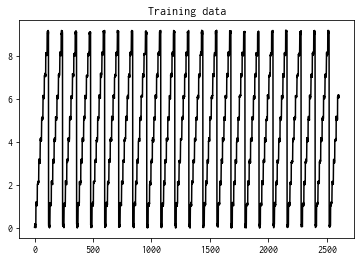

In [3]:
plt.plot(np.arange(X.shape[0]), X[:,0], c='black')
plt.title('Training data')
plt.show()

In [4]:
from hmmlearn.hmm import GaussianHMM

num_components = 10
hmm = GaussianHMM(n_components=num_components, covariance_type='diag', n_iter=1000)

print('Training the Hidden Marklov Model...')
hmm.fit(X)

print('Means and variances:')
for i in range(hmm.n_components):
    print('\nHidden state', i+1)
    print('Mean =', round(hmm.means_[i][0], 2))
    print('Variance =', round(np.diag(hmm.covars_[i])[0], 2))

Training the Hidden Marklov Model...
Means and variances:

Hidden state 1
Mean = 4.1
Variance = 0.0

Hidden state 2
Mean = 8.09
Variance = 0.0

Hidden state 3
Mean = 1.1
Variance = 0.0

Hidden state 4
Mean = 5.09
Variance = 0.0

Hidden state 5
Mean = 6.1
Variance = 0.0

Hidden state 6
Mean = 0.1
Variance = 0.0

Hidden state 7
Mean = 9.1
Variance = 0.0

Hidden state 8
Mean = 2.1
Variance = 0.0

Hidden state 9
Mean = 3.1
Variance = 0.0

Hidden state 10
Mean = 7.09
Variance = 0.0


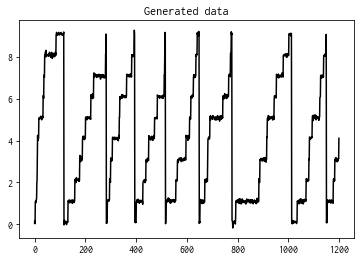

In [5]:
num_samples = 1200
generated_data, _ = hmm.sample(num_samples)
plt.plot(np.arange(num_samples), generated_data[:, 0], c='black')
plt.title('Generated data')
plt.show()